In [165]:
import deep_lib.model_structure as dl
import deep_lib.plot_utils as dlu
import h5py
import numpy as np
import scipy
import matplotlib.pyplot as plt
import ipywidgets as wg

from scipy import ndimage
from deep_lib.model_parameters import Hyperparameters, xavier_initializer, zero_initializer, he_initializer

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [166]:
def load_data(training_file='datasets/train_catvnoncat.h5', test_file='datasets/test_catvnoncat.h5'):
    train_dataset = h5py.File(training_file, "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File(test_file, "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [167]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data('/Users/fperez/dev/datasets/train_catvnoncat.h5', '/Users/fperez/dev/datasets/test_catvnoncat.h5')

In [168]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten / 255.
test_x = test_x_flatten / 255.

In [213]:
hyperparameters = Hyperparameters(iterations = 1500,
                                  layer_dimensions = (12288, 20, 7, 5, 1), 
                                  learning_rate = 0.0005, 
                                  param_initializer = xavier_initializer, 
                                  lambd=0.1, 
                                  keep_prob=0.99,
                                  minibatch_size=8)
print(hyperparameters)

Hyperparameters:
        Iterations: 1500
        Layer dims: (12288, 20, 7, 5, 1)
        Learning_rate: 0.000500
        Parameter initializer: xavier_initializer
        Lambd (L2 Reg param): 0.10
        Keep Prob (Dropout): 0.99
        Minibatch size: 8
        


FloatProgress(value=1401.0, description='Iterations:', max=1500.0)

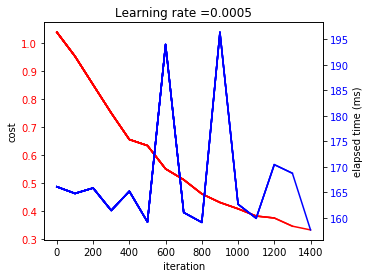

2018-04-19 17:01:54,658 - deep_lib.model_structure - INFO - Cost after iteration 1400: 0.331766 (elapsed time: 157.638ms)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cach

Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 1)
Layer F 2
Cache (7, 1)
Layer F 3
Cache (5, 1)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20,

Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 1)
Layer F 2
Cache (7, 1)
Layer F 3
Cache (5, 1)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20,

Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 1)
Layer F 2
Cache (7, 1)
Layer F 3
Cache (5, 1)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20,

Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 1)
Layer F 2
Cache (7, 1)
Layer F 3
Cache (5, 1)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20,

Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 1)
Layer F 2
Cache (7, 1)
Layer F 3
Cache (5, 1)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 

Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20,

Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20,

Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20,

Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 

Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 1)
Layer F 2
Cache (7, 1)
Layer F 3
Cache (5, 1)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20,

Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 1)
Layer F 2
Cache (7, 1)
Layer F 3
Cache (5, 1)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20,

Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20,

Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 1)
Layer F 2
Cache (7, 1)
Layer F 3
Cache (5, 1)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20,

Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 1)
Layer F 2
Cache (7, 1)
Layer F 3
Cache (5, 1)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20,

Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 1)
Layer F 2
Cache (7, 1)
Layer F 3
Cache (5, 1)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20,

Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 1)
Layer F 2
Cache (7, 1)
Layer F 3
Cache (5, 1)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20,

Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 1)
Layer F 2
Cache (7, 1)
Layer F 3
Cache (5, 1)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20,

Layer F 1
Cache (20, 1)
Layer F 2
Cache (7, 1)
Layer F 3
Cache (5, 1)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20,

Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20, 8)
Layer F 2
Cache (7, 8)
Layer F 3
Cache (5, 8)
Layer F 1
Cache (20,

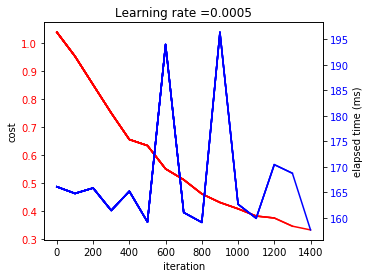

In [214]:
np.random.seed(1)
model = dl.LLayerModel()
parameters, costs = model.execute(train_x, train_y, hyperparameters, save_cost=True)

In [215]:
train_predictions = model.predict(train_x, train_y, parameters)
test_predictions = model.predict(test_x, test_y, parameters)

Accuracy: 0.99043062201
Accuracy: 0.86


In [ ]:
image_widget = wg.interactive(dlu.load_image, url="http://78.media.tumblr.com/tumblr_lnqvm6zb671qi7nl3o1_1280.jpg")

display(image_widget)

In [ ]:
num_px = 64
my_label_y = [1]
image = image_widget.result
print(image.shape)
# print(image)
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
print(my_image.shape)
my_predicted_image = model.predict(my_image, my_label_y, parameters)



In [ ]:
plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

In [157]:
import math

r  = -4 * np.random.rand()
print(r)
alpha = math.pow(10, r)
print(alpha)

r  = np.random.rand()

beta = 1-10**(- r - 1)
print(beta)

-0.972411244354392
0.10655866126101378
0.9287234303362749


In [154]:
r1  = -3 * np.random.rand()
r2  = -1 * np.random.rand()
print(r1)
print(r2)
r = r2 - r1
print(r)
beta = 1 - math.pow(10, r)
print(beta)

-0.09819715036557042
-0.3967678156829826
-0.29857066531741216
0.49716055927326175
